# Exercise 1
1)This question should be answered using the Weekly data set, whichis part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors.
Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

(e) Repeat (d) using LDA

(f) Repeat (d) using QDA.

## Solution 

In [1]:
#install.packages('ISLR')
#install.packages('MASS')


library(ISLR)
library(MASS)
data = Weekly
data[1:10,] # == head(data,10) <> tail(data,10)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down
7,1990,-1.372,1.178,0.712,3.514,-2.576,0.1517220,0.807,Up
8,1990,0.807,-1.372,1.178,0.712,3.514,0.1323100,0.041,Up
9,1990,0.041,0.807,-1.372,1.178,0.712,0.1439720,1.253,Up


In [2]:
cat('The sum of missing values =',sum(is.na(data)))
data.new <- na.omit(data) # To remove missing values 

The sum of missing values = 0

### (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [3]:
summary(data)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

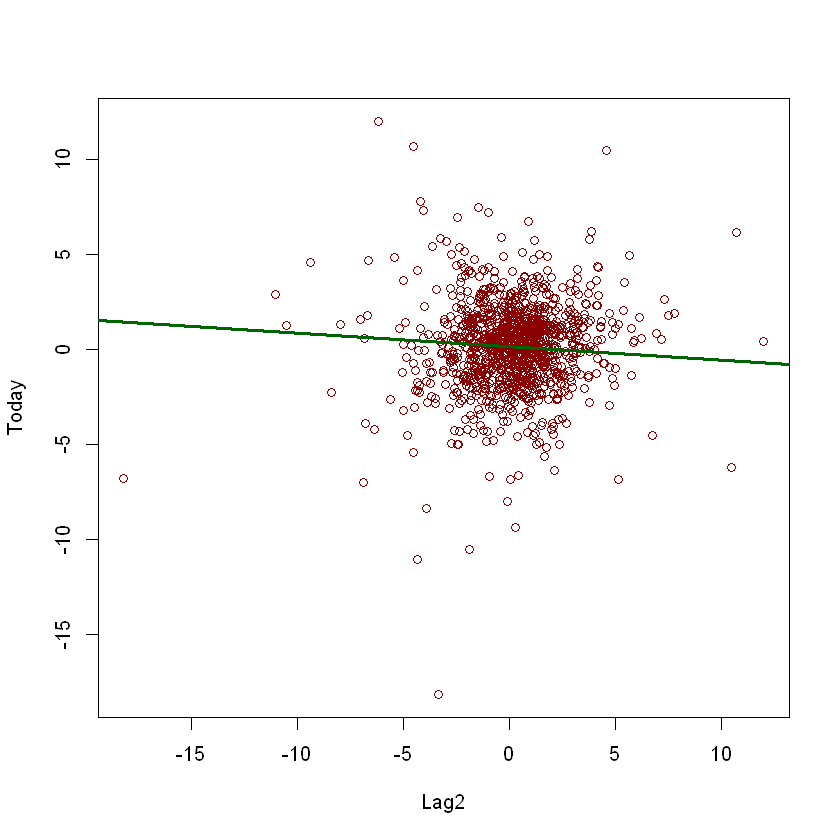

In [4]:
plot(Today~Lag2, col="darkred", data=Weekly)
simplelm = lm(Today~Lag3, data=Weekly)
abline(simplelm, lwd= 3, col= "darkgreen")

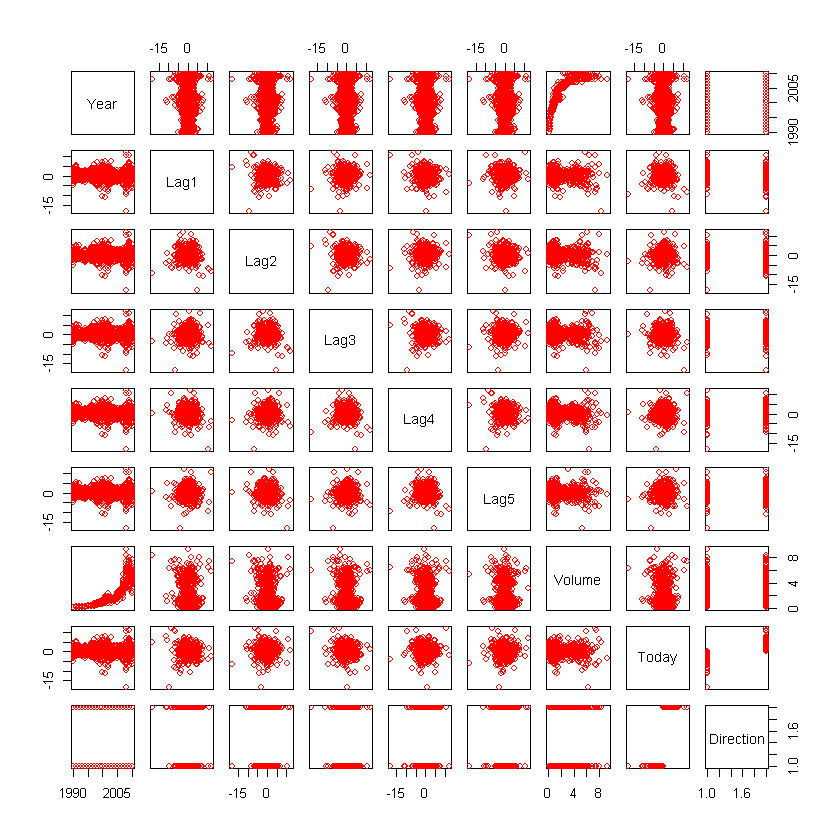

In [5]:
pairs(Weekly,col='red')  

### (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [6]:
logmod = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,family = "binomial", data=Weekly)
summary(logmod)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = "binomial", data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Từ trên chúng ta có thể nhận thấy rằng biến Lag2 là có ý nghĩa thống kê. Hệ số ước tính của Lap2 là 0.058.

Vậy tỷ số khả dĩ Odds ratio = e^0.058 = 1.06


### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression. (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [7]:
#confusion matrix
probs = predict(logmod, type="response")
preds = rep("Down", 1089)
preds[probs > 0.5] = "Up"
table(preds, Weekly$Direction)

      
preds  Down  Up
  Down   54  48
  Up    430 557

#### Qua ma trận nhầm lẫn: 
    Ta thấy: The test error rate = (48 + 430)/1089 = 0.43

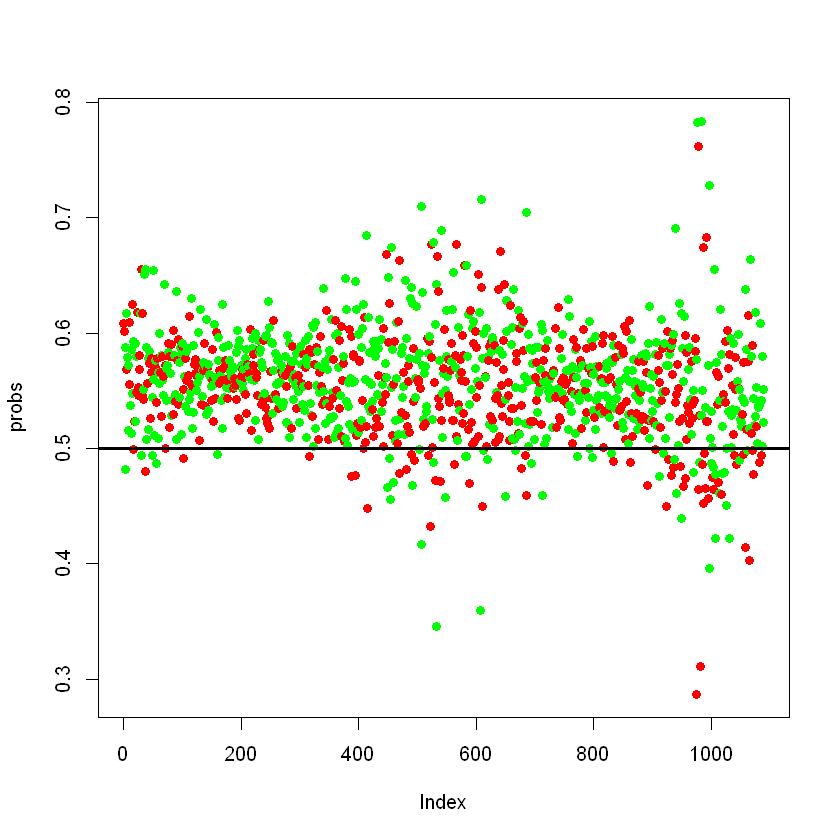

In [8]:
plot(probs, col= ifelse(data$Direction=="Down", "red","green"), pch=16)
abline(h = 0.5, lwd= 3)

Khi lấy ngưỡng là 0.5 ta nhận thấy gần như nó dự đoán ra là Up

### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [9]:
training.data = data[data$Year<2009,]
test.data = data[data$Year>2008,]
simpglm = glm(Direction~Lag2, data= training.data, family = "binomial")
summary(simpglm)


Call:
glm(formula = Direction ~ Lag2, family = "binomial", data = training.data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [10]:
testprobs = predict(simpglm, type="response", newdata = test.data)
testdirs = data$Direction[data$Year>2008]
testpreds = rep("Down", 104)
testpreds[testprobs>0.5] = "Up"
table(testpreds, testdirs)

         testdirs
testpreds Down Up
     Down    9  5
     Up     34 56

The test error rate for the logistic regression is (5+34)/104 = 0.375.

### e) Repeat (d) using LDA

In [11]:
lda.fit = lda(Direction~Lag2, data= training.data)
lda.fit

Call:
lda(Direction ~ Lag2, data = training.data)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

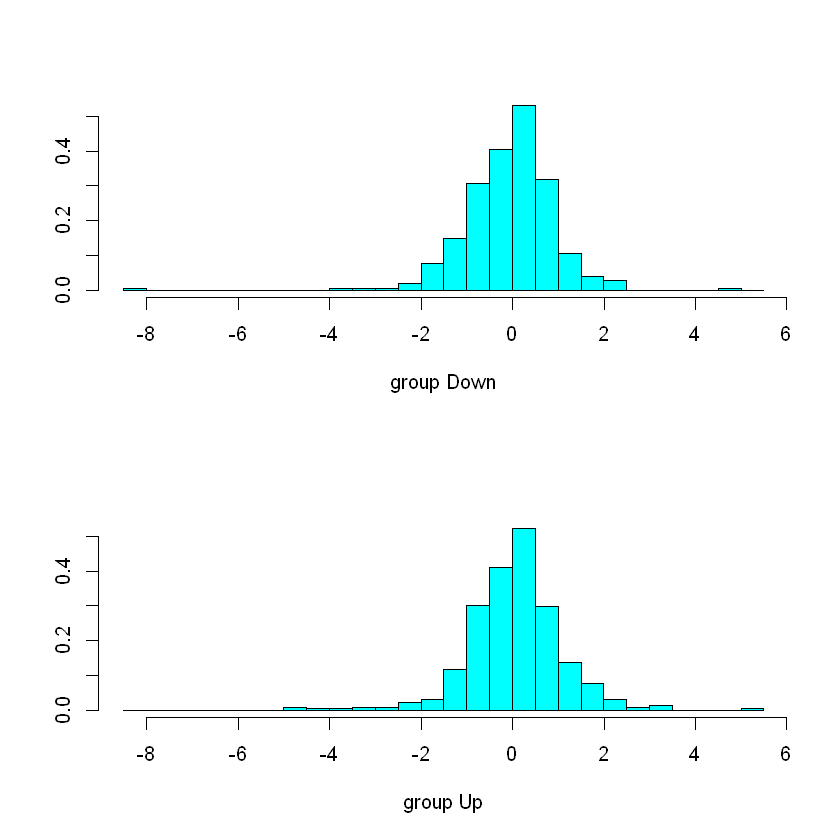

In [12]:
plot(lda.fit)

In [13]:
lda.pred = predict(lda.fit, newdata=test.data, type="response")
lda.class = lda.pred$class
table(lda.class, test.data$Direction)

         
lda.class Down Up
     Down    9  5
     Up     34 56

#### Accuracy = 37.5%

### (f) Repeat (d) using QDA.

In [14]:
qda.fit = qda(Direction~Lag2, data= training.data)
qda.fit

Call:
qda(Direction ~ Lag2, data = training.data)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [15]:
qda.pred = predict(qda.fit, newdata=test.data, type="response")
qda.class = qda.pred$class
table(qda.class, test.data$Direction)

         
qda.class Down Up
     Down    0  0
     Up     43 61

Tỷ lệ lỗi cho QDA dường như là tồi tệ nhất trong tất cả các mô hình: 41,35%.

Về cơ bản, nó phân loại TẤT CẢ các dữ liệu là UP.

-------------------------------------------------------------------------------------------------------------------------------
# Exercise 2
2. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and
boxplots may be useful tools to answer this question. Describe your findings.

(c) Split the data into a training set and a test set.

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in(b). What is the test error of the model obtained?

(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?


In [16]:
# load Auto data ....
library(ISLR)
attach(Auto)
head(Auto,10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500
7,14,8,454,220,4354,9.0,70,1,chevrolet impala
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii
9,14,8,455,225,4425,10.0,70,1,pontiac catalina


In [17]:
cat('The sum of missing value:',sum(is.na(Auto))) # check missing value 

The sum of missing value: 0

### (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [18]:
medi = median(Auto$mpg)
Auto$mpg01 = ifelse(Auto$mpg > medi,1,0)
head(Auto,20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0
7,14,8,454,220,4354,9.0,70,1,chevrolet impala,0
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii,0
9,14,8,455,225,4425,10.0,70,1,pontiac catalina,0


### (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

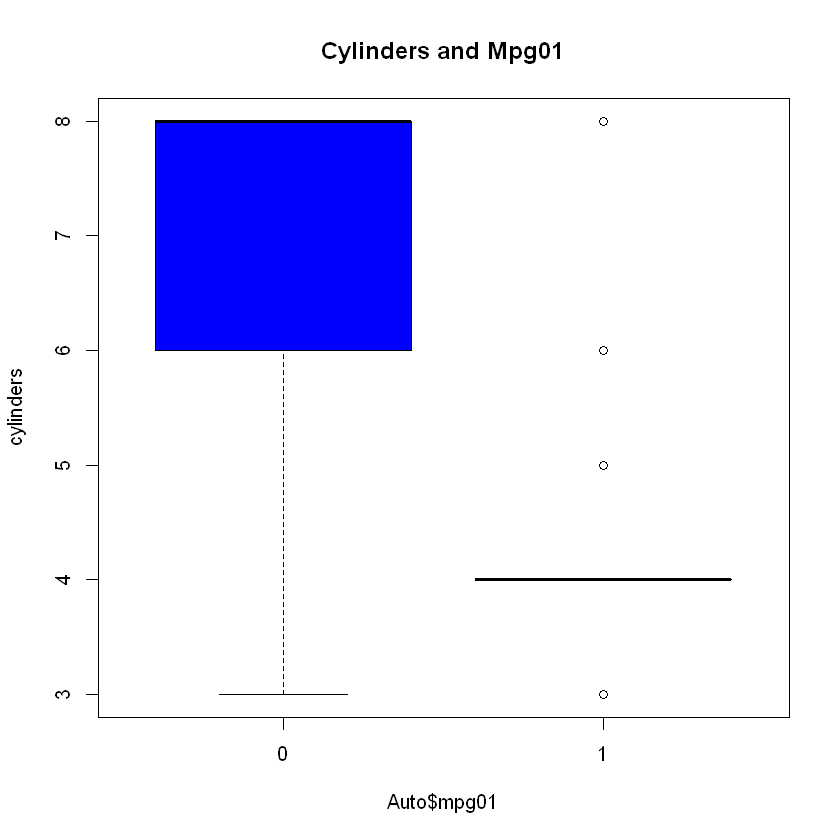

In [19]:
boxplot(cylinders ~ Auto$mpg01, col = 'blue', main = 'Cylinders and Mpg01')

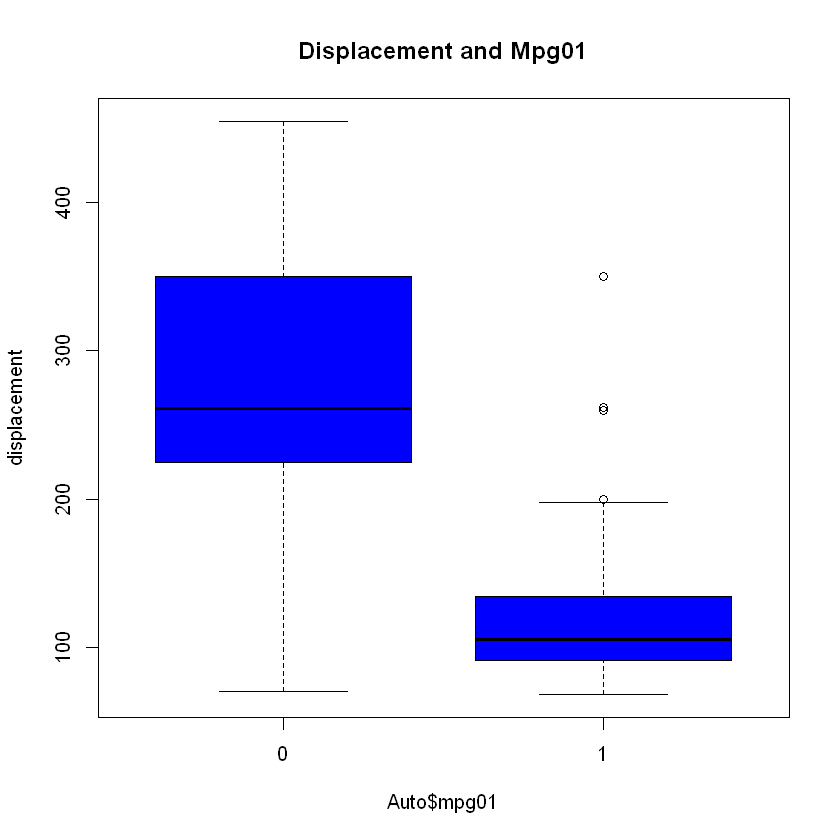

In [20]:
boxplot(displacement ~ Auto$mpg01,col = 'blue',main = 'Displacement and Mpg01')

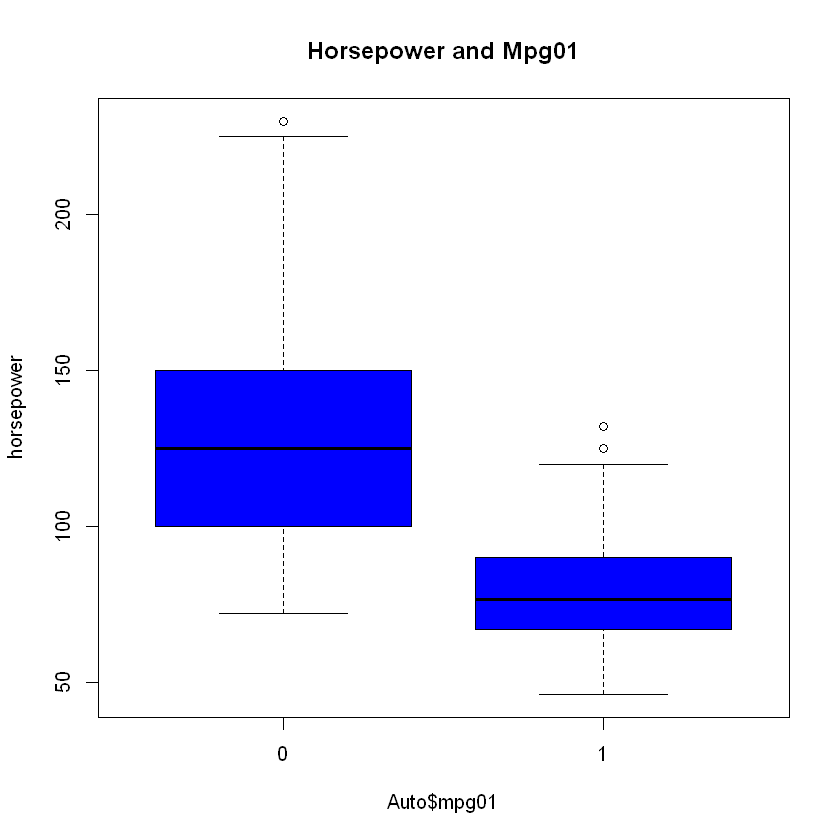

In [21]:
boxplot(horsepower ~ Auto$mpg01,col = 'blue',main = 'Horsepower and Mpg01')

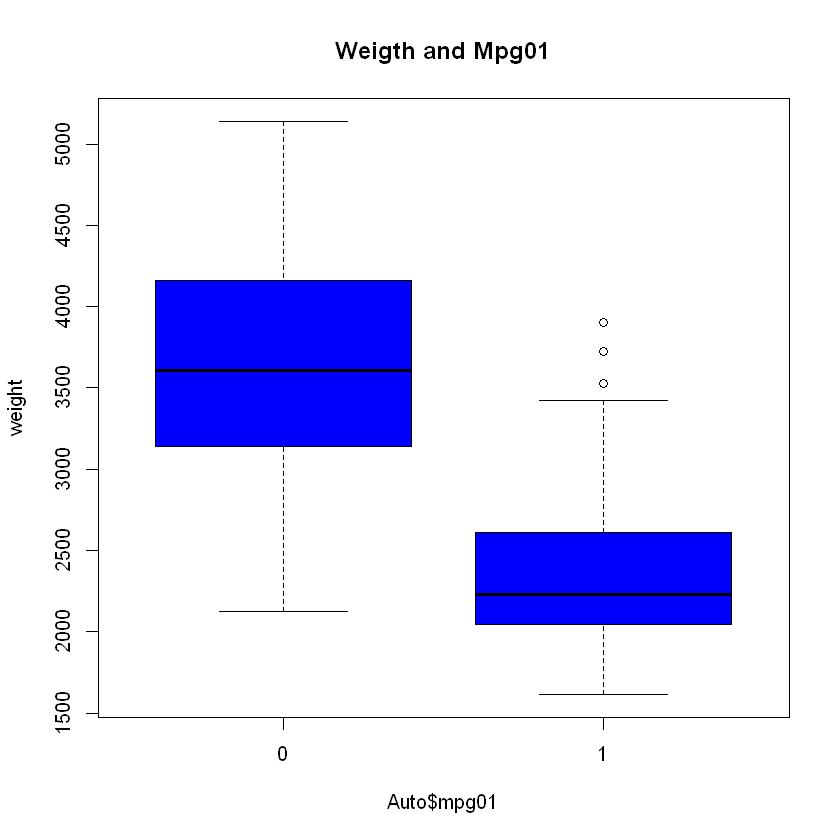

In [22]:
boxplot(weight ~ Auto$mpg01,col = 'blue',main = 'Weigth and Mpg01')

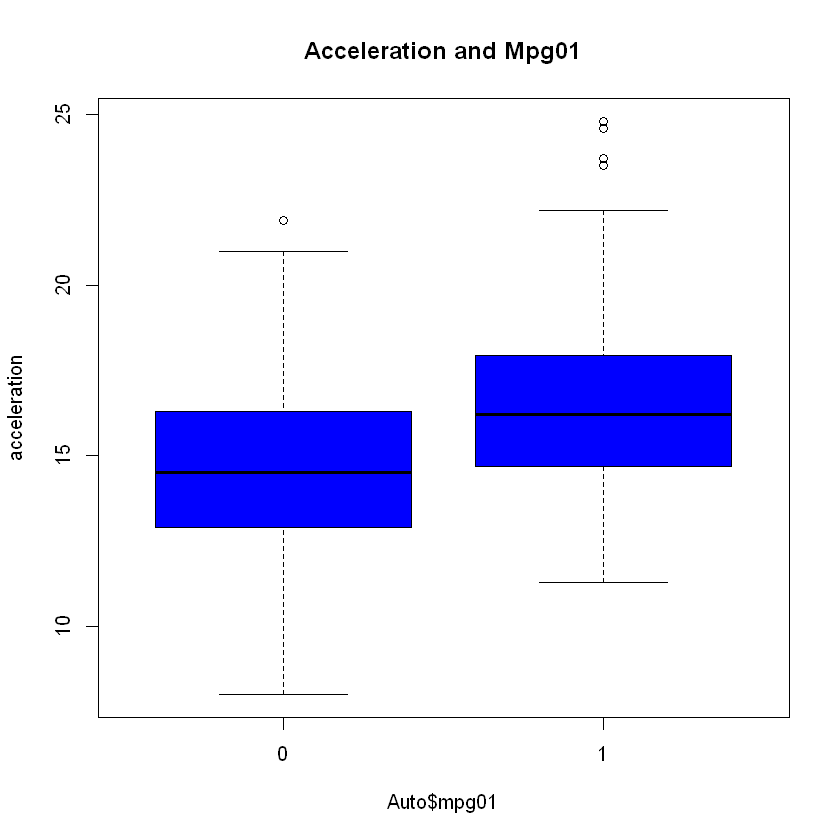

In [23]:
boxplot(acceleration ~ Auto$mpg01,col = 'blue',main = 'Acceleration and Mpg01')

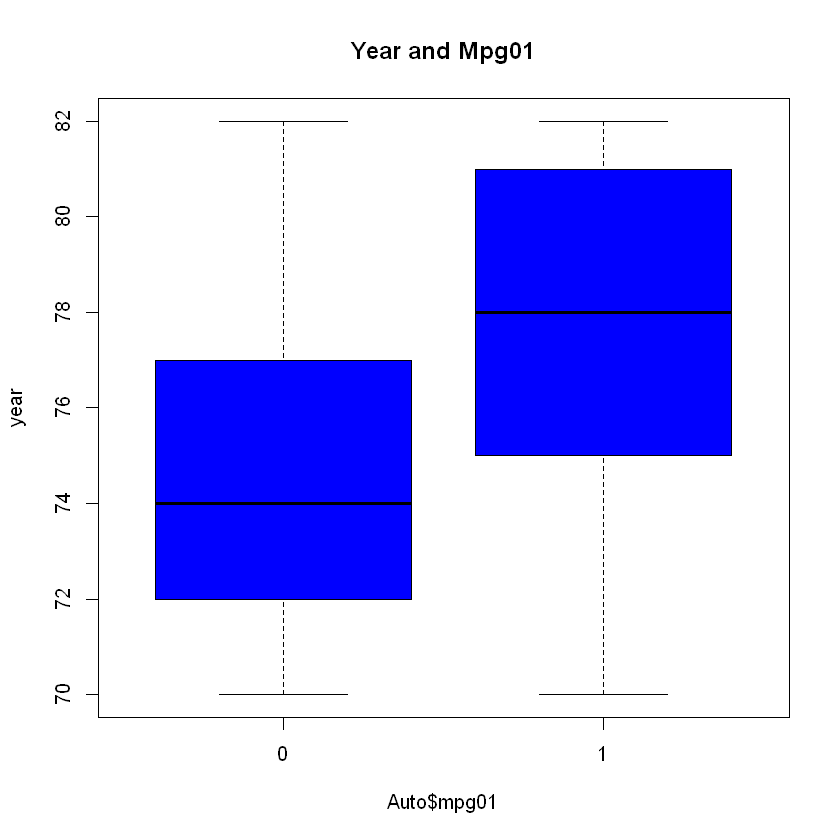

In [24]:
boxplot(year ~ Auto$mpg01,col = 'blue',main = 'Year and Mpg01')

### (c) Split the data into a training set and a test set.

In [25]:
set.seed(1)
num_train <- nrow(Auto) * 0.8
inTrain <- sample(nrow(Auto), size = num_train)
training <- Auto[inTrain,]
testing <- Auto[-inTrain,]
cat('The sum of rows of Auto data:',nrow(Auto))
cat('\nThe sum of rows of training data:',nrow(training))
cat('\nThe sum of rows of testing data:',nrow(testing))

The sum of rows of Auto data: 392
The sum of rows of training data: 313
The sum of rows of testing data: 79

### (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in(b). What is the test error of the model obtained?

In [26]:
lda = lda(mpg01~cylinders  + horsepower + weight + year, data = training)
pred = predict(lda,testing)
table(pred$class,testing$mpg01)

   
     0  1
  0 37  0
  1  5 37

In [27]:
cat('Accuracy:', mean(pred$class==testing$mpg01))


Accuracy: 0.9367089

### (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [28]:
qda = qda(mpg01~cylinders  + horsepower + weight + year, data = training)
pred = predict(qda,testing)
table(pred$class,testing$mpg01)

   
     0  1
  0 37  1
  1  5 36

In [29]:
cat('Accuracy:', mean(pred$class==testing$mpg01))

Accuracy: 0.9240506

### (f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [30]:
glm = glm(mpg01~cylinders  + horsepower + weight + year, data = training,family = binomial)
summary(glm)


Call:
glm(formula = mpg01 ~ cylinders + horsepower + weight + year, 
    family = binomial, data = training)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.19552  -0.13055   0.03418   0.25167   3.09058  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.529e+01  5.179e+00  -2.953  0.00315 ** 
cylinders   -6.915e-02  2.828e-01  -0.245  0.80682    
horsepower  -3.209e-02  1.713e-02  -1.873  0.06102 .  
weight      -4.519e-03  8.997e-04  -5.022 5.10e-07 ***
year         4.141e-01  7.928e-02   5.223 1.76e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 433.83  on 312  degrees of freedom
Residual deviance: 136.53  on 308  degrees of freedom
AIC: 146.53

Number of Fisher Scoring iterations: 7


In [31]:
pred <- predict(glm, testing, type = 'response')
pred_values <- round(pred)
table(pred_values, testing$mpg01)

           
pred_values  0  1
          0 38  2
          1  4 35

In [32]:
cat('Accuracy:', mean(pred_values==testing$mpg01))

Accuracy: 0.9240506